## ***Import Libraries***

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import classification_report, confusion_matrix ,log_loss
import joblib



## ***Exploring Dataset***

In [2]:
train_data = pd.read_csv('train.csv')
train_data.shape


(7905, 20)

In [3]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)


(5271, 19)


In [5]:
test_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [8]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()


['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']


id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [9]:
print(f'Values Of Status :{train_data["Status"].unique()}')
print(f'Values Of Drug :{train_data["Drug"].unique()}')
print(f'Values Of Edema :{train_data["Edema"].unique()}')



Values Of Status :['D' 'C' 'CL']
Values Of Drug :['D-penicillamine' 'Placebo']
Values Of Edema :['N' 'Y' 'S']


In [10]:
print(train_data.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


In [11]:
print(test_data.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


## ***Data Cleaning***

+ ***Dealing With Binary Cols***

In [12]:
binary_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
label_encoder = LabelEncoder()
for column in binary_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

train_data.head()


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


+ ***Dealing With Categorical Cols***

In [13]:
edema_dummies = pd.get_dummies(train_data['Edema'], prefix='Edema')
train_data = pd.concat([train_data, edema_dummies], axis=1)
train_data = train_data.drop('Edema', axis=1)

In [14]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,D-penicillamine,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,True,False,False
1,1,2574,Placebo,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,True,False,False
2,2,3428,Placebo,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,False,False,True
3,3,2576,Placebo,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,True,False,False
4,4,788,Placebo,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,True,False,False


In [15]:
Edema_columns = ['Edema_N', 'Edema_S', 'Edema_Y']
label_encoder = LabelEncoder()
for column in Edema_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])

train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,D-penicillamine,21532,1,0,0,0,2.3,316.0,...,1601.0,179.80,63.0,394.0,9.7,3.0,D,1,0,0
1,1,2574,Placebo,19237,0,0,0,0,0.9,364.0,...,1440.0,134.85,88.0,361.0,11.0,3.0,C,1,0,0
2,2,3428,Placebo,13727,0,0,1,1,3.3,299.0,...,1029.0,119.35,50.0,199.0,11.7,4.0,D,0,0,1
3,3,2576,Placebo,18460,0,0,0,0,0.6,256.0,...,1653.0,71.30,96.0,269.0,10.7,3.0,C,1,0,0
4,4,788,Placebo,16658,0,0,1,0,1.1,346.0,...,1181.0,125.55,96.0,298.0,10.6,4.0,C,1,0,0


In [16]:
train_data['Drug'] = train_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

+ ***Feature Scaling***

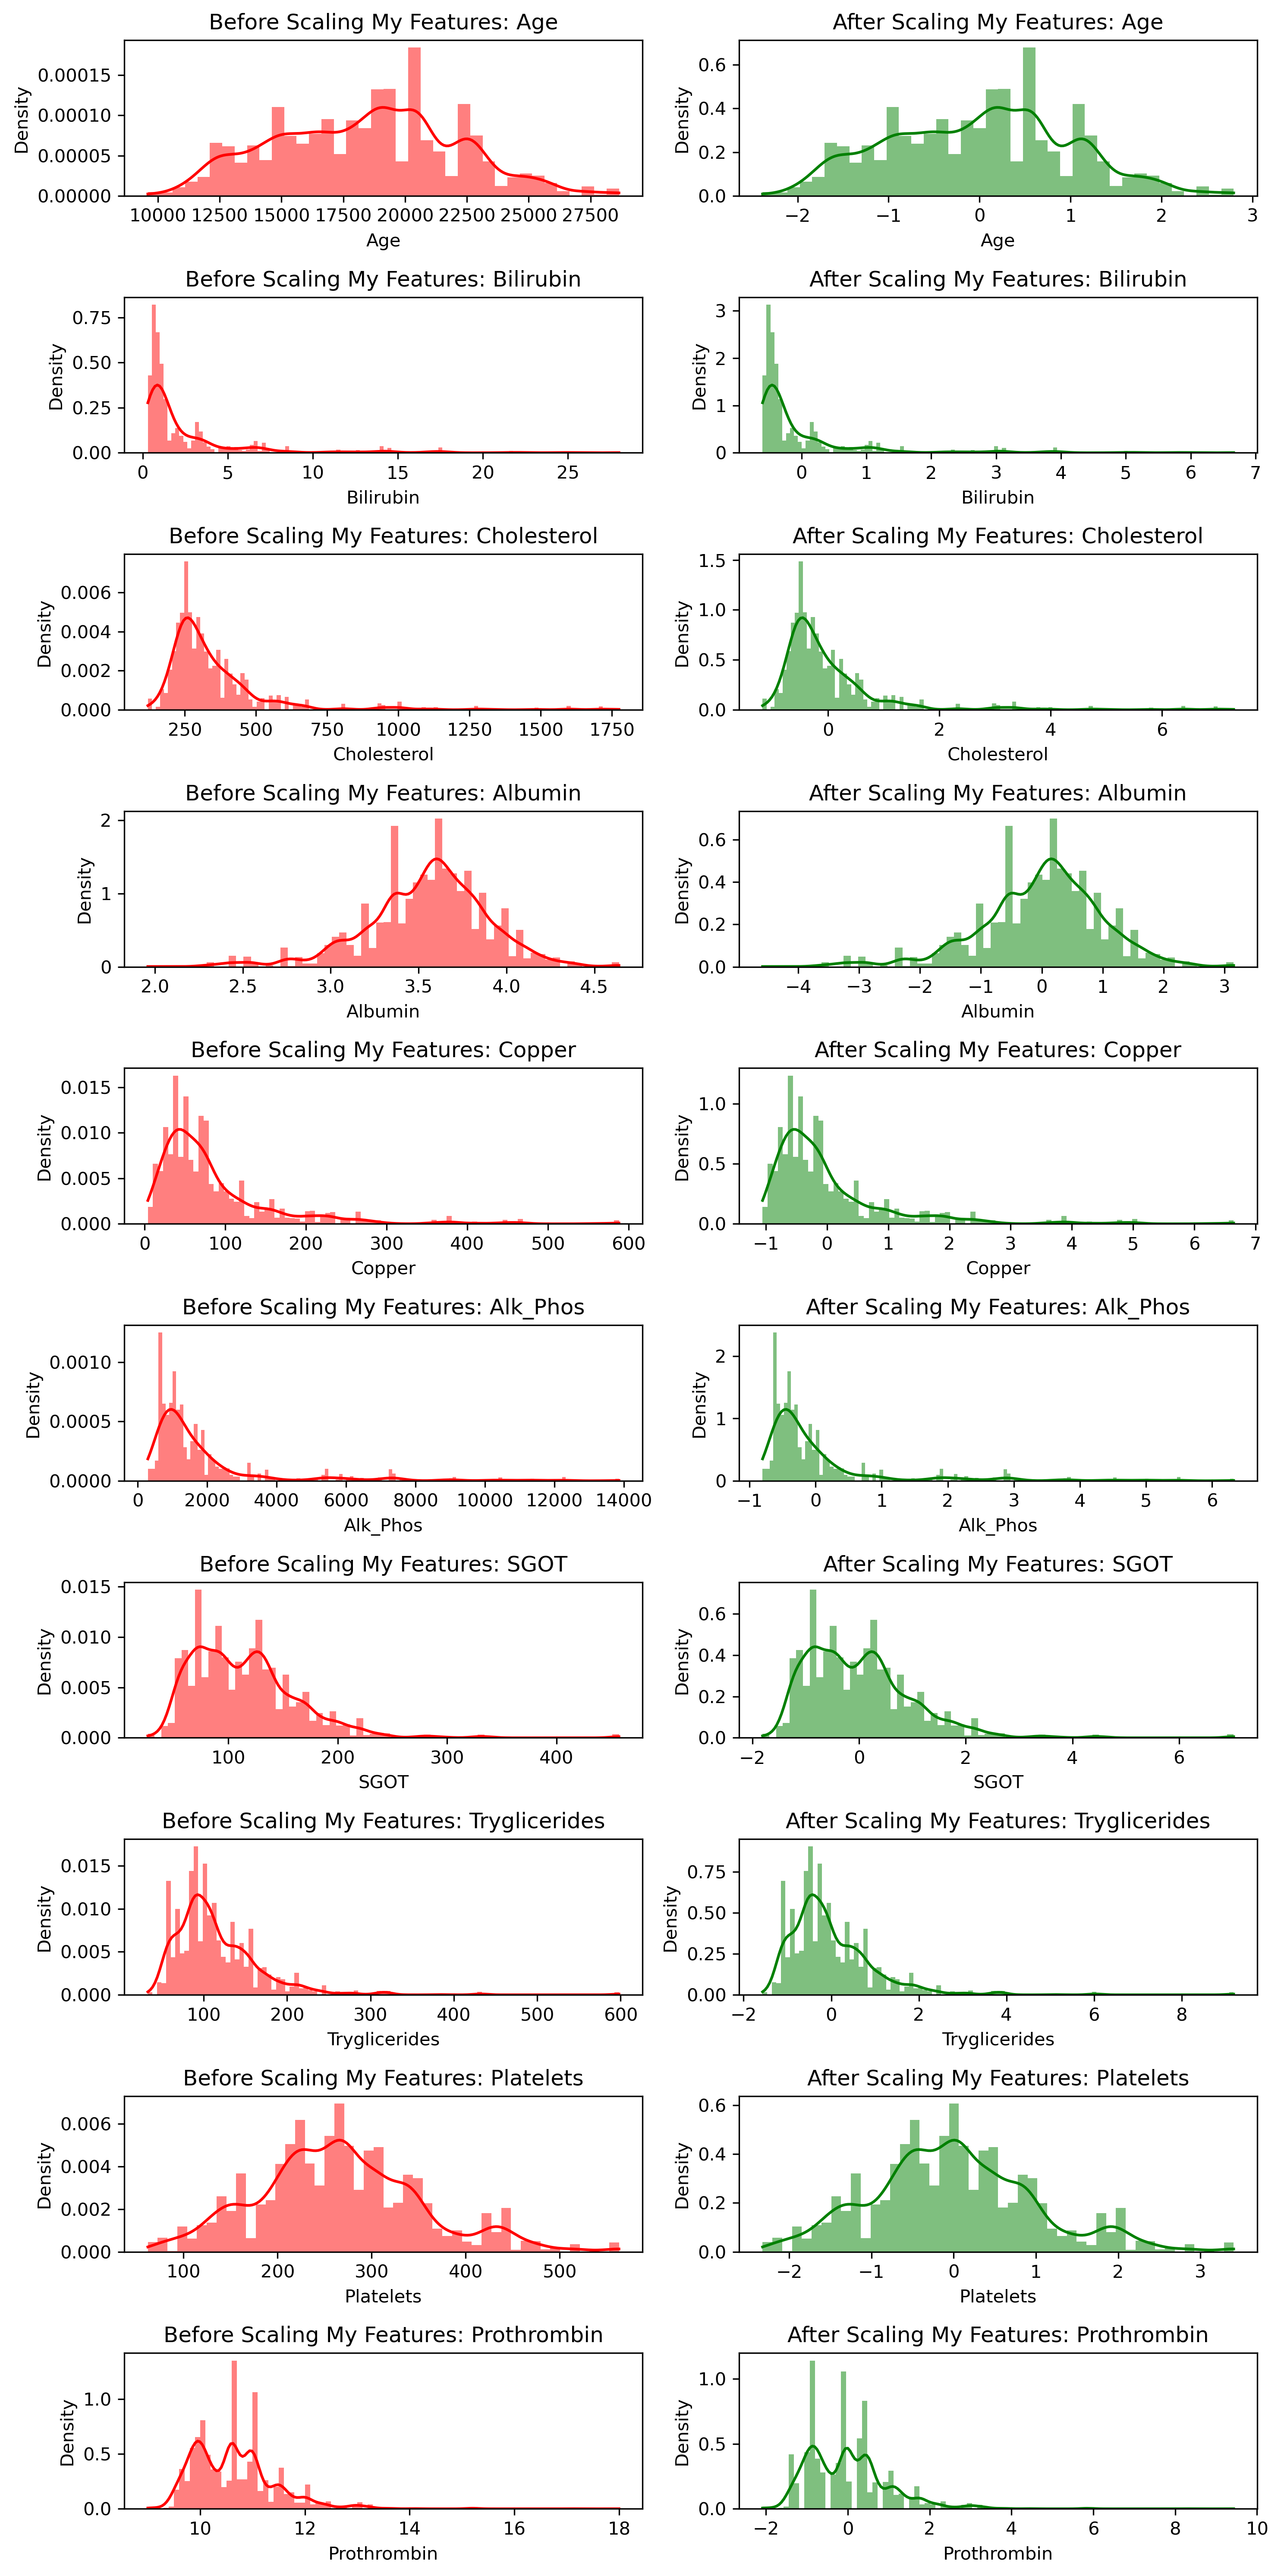

In [17]:
Scaling_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


sc = StandardScaler()
train_data_sc = train_data.copy()
train_data_sc[Scaling_features] = sc.fit_transform(train_data_sc[Scaling_features])


nrows = len(Scaling_features)
ncols = 2


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 2 * nrows), dpi=300)


for i, col in enumerate(Scaling_features):
    
    sns.histplot(train_data[col], kde=True, stat="density", linewidth=0, ax=axes[i, 0],color='red')
    axes[i, 0].set_title(f'Before Scaling My Features: {col}')
    
    
    sns.histplot(train_data_sc[col], kde=True, stat="density", linewidth=0, ax=axes[i, 1],color='green')
    axes[i, 1].set_title(f'After Scaling My Features: {col}')


plt.tight_layout()
plt.show()

In [18]:
train_data_sc.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
0,0,999,1,0.858448,1,0,0,0,-0.077237,-0.176908,...,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,D,1,0,0
1,1,2574,0,0.234760,0,0,0,0,-0.444429,0.068784,...,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,1,0,0
2,2,3428,0,-1.262634,0,0,1,1,0.185043,-0.263923,...,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,D,0,0,1
3,3,2576,0,0.023603,0,0,0,0,-0.523113,-0.484022,...,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,1,0,0
4,4,788,0,-0.466107,0,0,1,0,-0.391973,-0.023351,...,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,1,0,0


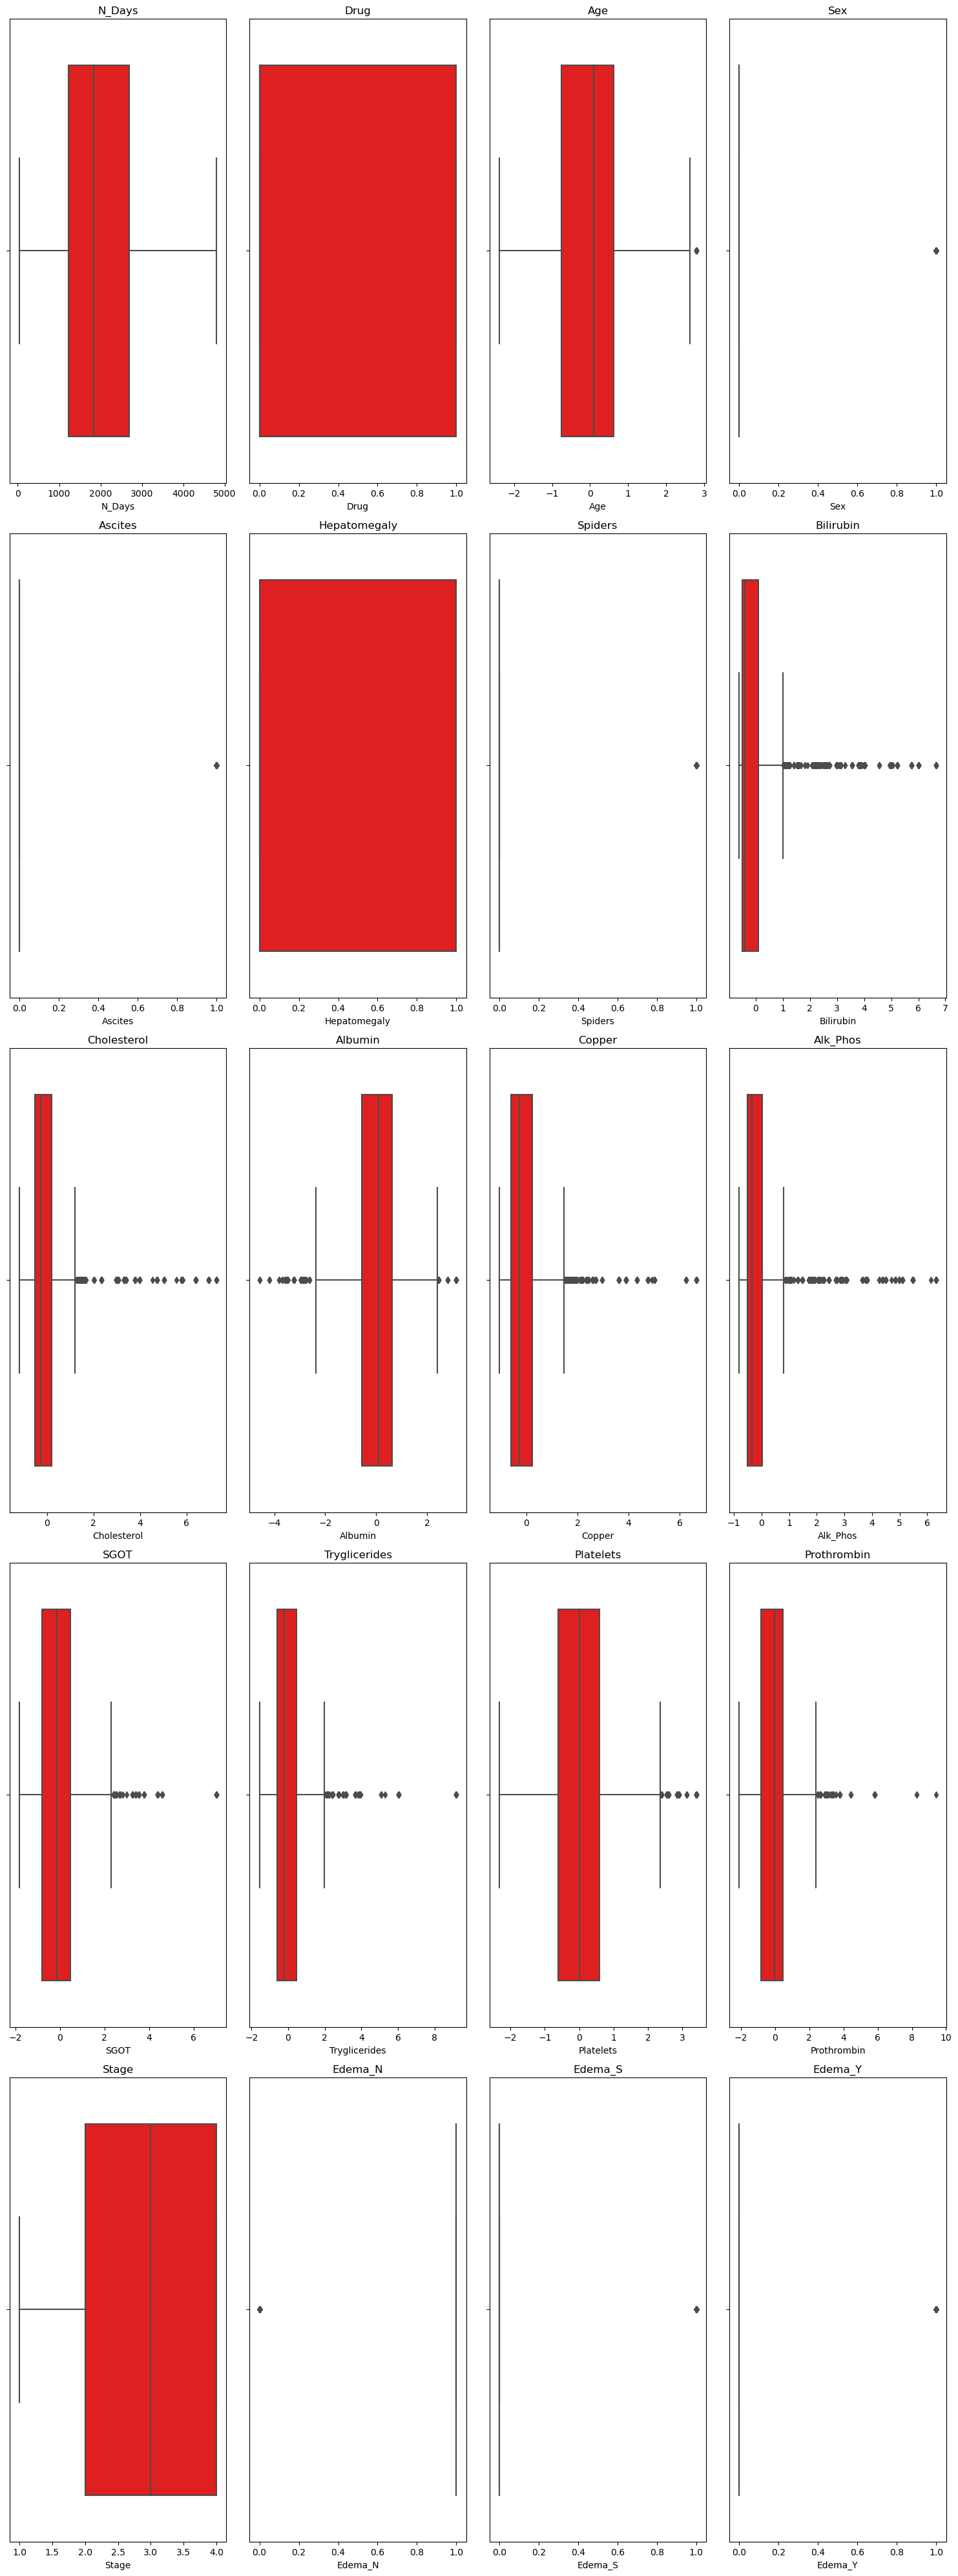

In [19]:
num_features = train_data_sc.drop(columns='id').select_dtypes(include=['number'])

total_num_features = len(num_features.columns)


fig , axes = plt.subplots(nrows=5 , ncols = 4 ,figsize=(15,40))
axes = axes.flatten()
for i , col in enumerate(num_features.columns):
    if i < total_num_features :
        sns.boxplot(x =train_data_sc[col] , ax = axes[i],color='red')
        axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()


In [20]:
def out_liers(train_data_sc , col):
    if pd.api.types.is_numeric_dtype(train_data_sc[col]):
        Q1  , Q3 = np.percentile(train_data_sc[col] , [25,75])
        IQR = Q3 - Q1
        l_bound = Q1 - (1.5 * IQR) ## Lower Bound
        u_bound = Q3 + (1.5 * IQR) ## Upper Bound
        train_data_sc = train_data_sc[(train_data_sc[col]>=l_bound) & (train_data_sc[col] <=u_bound)]

    return train_data_sc

In [21]:
for col in train_data_sc.columns:
    train_data_sc = out_liers(train_data_sc, col)
    print(f'--------------------------------------------------------')
    print(f'Dataset Shape After Removing Outliers From ({col}): {train_data_sc.shape}\n')

--------------------------------------------------------
Dataset Shape After Removing Outliers From (id): (7905, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (N_Days): (7905, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Drug): (7905, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Age): (7869, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Sex): (7323, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Ascites): (6988, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Hepatomegaly): (6988, 22)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Spiders): (5392, 22)

----------------------------

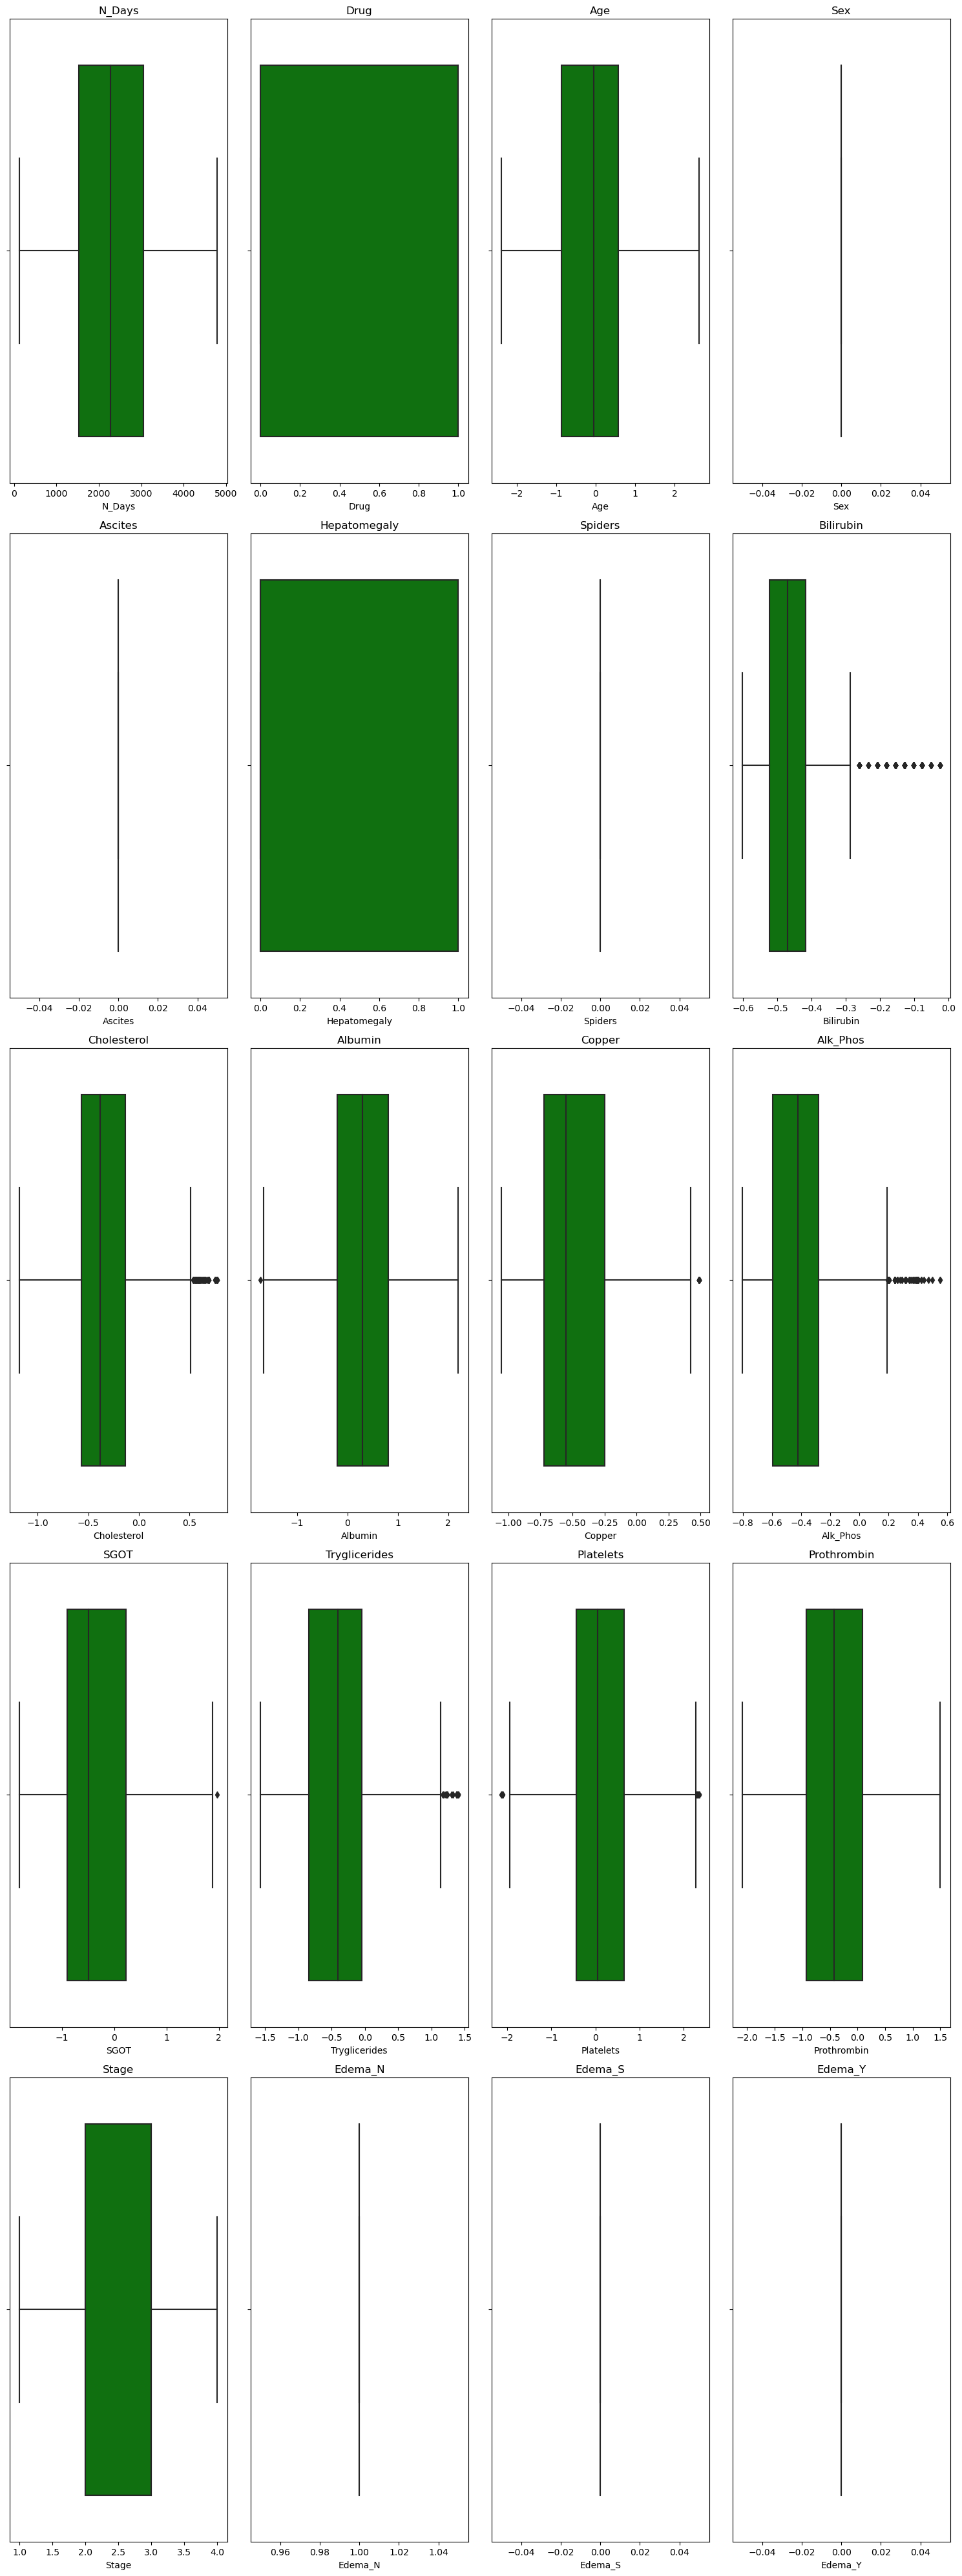

In [22]:
num_features = train_data_sc.drop(columns='id').select_dtypes(include=['number'])

total_num_features = len(num_features.columns)


fig , axes = plt.subplots(nrows=5 , ncols = 4 ,figsize=(15,40))
axes = axes.flatten()
for i , col in enumerate(num_features.columns):
    if i < total_num_features :
        sns.boxplot(x =train_data_sc[col] , ax = axes[i],color='green')
        axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [23]:
train_data_sc.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Edema_N,Edema_S,Edema_Y
1,1,2574,0,0.234760,0,0,0,0,-0.444429,0.068784,...,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,1,0,0
3,3,2576,0,0.023603,0,0,0,0,-0.523113,-0.484022,...,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,1,0,0
4,4,788,0,-0.466107,0,0,1,0,-0.391973,-0.023351,...,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,1,0,0
6,6,1300,0,-0.182119,0,0,0,0,-0.418201,-0.115485,...,-0.073410,0.478508,-0.482421,0.294661,-1.061120,3.0,C,1,0,0
9,9,2615,1,-0.914238,0,0,0,0,-0.444429,0.652301,...,-0.030860,1.155931,0.469469,-0.357066,-0.037691,2.0,C,1,0,0


In [24]:
train_data_sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3232 entries, 1 to 7904
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3232 non-null   int64  
 1   N_Days         3232 non-null   int64  
 2   Drug           3232 non-null   int64  
 3   Age            3232 non-null   float64
 4   Sex            3232 non-null   int32  
 5   Ascites        3232 non-null   int32  
 6   Hepatomegaly   3232 non-null   int32  
 7   Spiders        3232 non-null   int32  
 8   Bilirubin      3232 non-null   float64
 9   Cholesterol    3232 non-null   float64
 10  Albumin        3232 non-null   float64
 11  Copper         3232 non-null   float64
 12  Alk_Phos       3232 non-null   float64
 13  SGOT           3232 non-null   float64
 14  Tryglicerides  3232 non-null   float64
 15  Platelets      3232 non-null   float64
 16  Prothrombin    3232 non-null   float64
 17  Stage          3232 non-null   float64
 18  Status       

In [25]:
status = train_data_sc['Status']
train_data_sc = train_data_sc.drop('Status', axis=1)
train_data_sc['Status'] = status


In [26]:
train_data_sc = train_data_sc.drop('id', axis=1)

In [27]:
X = train_data_sc.drop('Status', axis=1)  
y = train_data_sc['Status']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

In [29]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           C       0.93      0.89      0.91       580
          CL       0.12      0.17      0.14        12
           D       0.28      0.40      0.33        55

    accuracy                           0.83       647
   macro avg       0.45      0.48      0.46       647
weighted avg       0.86      0.83      0.85       647

Confusion Matrix:
 [[515  11  54]
 [  8   2   2]
 [ 30   3  22]]


In [30]:
dt_model = DecisionTreeClassifier()

param_grid ={
    'max_depth' : [2,5,10,15,20,30,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(estimator=dt_model , param_grid= param_grid , cv=5 , n_jobs=-1 , verbose=2 , scoring='accuracy')

grid.fit(X_train, y_train)

best_dt_model = DecisionTreeClassifier(**grid.best_params_)
best_dt_model.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Fitting 5 folds for each of 126 candidates, totalling 630 fits


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.8804642166344294


In [39]:
joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')

joblib.dump(grid, 'grid_search_results.pkl')

['grid_search_results.pkl']

In [31]:
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000) 
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


y_pred_proba = logreg.predict_proba(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           C       0.91      0.99      0.95       580
          CL       0.00      0.00      0.00        12
           D       0.75      0.16      0.27        55

    accuracy                           0.91       647
   macro avg       0.55      0.39      0.41       647
weighted avg       0.88      0.91      0.87       647

Confusion Matrix:
 [[577   0   3]
 [ 12   0   0]
 [ 46   0   9]]
Log Loss: 0.3393297403819574


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
joblib.dump(logreg, 'best_Logistic_model.pkl')

['best_Logistic_model.pkl']

In [34]:
binary_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
label_encoder = LabelEncoder()
for column in binary_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])



edema_dummies = pd.get_dummies(test_data['Edema'], prefix='Edema')
test_data = pd.concat([test_data, edema_dummies], axis=1)
test_data = test_data.drop('Edema', axis=1)


Edema_columns = ['Edema_N', 'Edema_S', 'Edema_Y']
label_encoder = LabelEncoder()
for column in Edema_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])


test_data['Drug'] = test_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})


Scaling_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


sc = StandardScaler()
test_data_sc = test_data.copy()
test_data_sc[Scaling_features] = sc.fit_transform(test_data_sc[Scaling_features])



In [35]:
test_data_sc.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,7905,3839,1,0.342186,0,0,1,0,-0.363546,0.965540,...,-0.254101,-0.090552,0.782524,-0.480744,1.895231,-0.041463,2.0,1,0,0
1,7906,2468,1,-0.983033,0,0,0,0,-0.389506,1.534346,...,0.119925,-0.286401,0.782524,0.755049,-0.422762,-0.798430,2.0,1,0,0
2,7907,51,0,-1.492582,0,0,1,0,-0.155863,-1.005321,...,-0.499153,-0.439359,-0.895372,-0.271610,-0.582624,2.986409,4.0,0,0,1
3,7908,2330,1,0.561521,0,0,0,0,-0.519308,-0.296809,...,-0.576538,-0.649677,0.244331,-1.127159,0.068241,-0.041463,2.0,1,0,0
4,7909,1615,1,0.950520,0,0,1,0,-0.311625,-0.376641,...,0.468156,-0.362363,0.233097,0.203695,-0.491274,-1.050753,1.0,1,0,0


In [36]:

ids_test = test_data_sc['id'].copy()

test_data_sc_without_id = test_data_sc.drop('id', axis=1)

test_probabilities = logreg.predict_proba(test_data_sc_without_id)


submission_df = pd.DataFrame(ids_test)  

submission_df['Status_C'] = test_probabilities[:, 0]  # Probabilities For  'C' Class
submission_df['Status_CL'] = test_probabilities[:, 1]  # Probabilities For 'CL' Class
submission_df['Status_D'] = test_probabilities[:, 2]  # Probabilities FOr 'D' Class


submission_file_path = 'G:\Education\AI Projects\Multi-Class Prediction of Cirrhosis Outcomes\submission.csv'  
submission_df.to_csv(submission_file_path, index=False)

print(f"Submission file saved to: {submission_file_path}")

Submission file saved to: G:\Education\AI Projects\Multi-Class Prediction of Cirrhosis Outcomes\submission.csv
